In [2]:
import pandas as pd
#This read a data from CSV and prepare two data set "dataset1" and "Dataset2"
df = pd.read_csv('C:\Roman\sampletxt.txt').head(10)
#df2 = pd.read_csv('C:\Roman\sampletxt.txt').tail()
dataset1 = df.loc[:,["Name","Team","Salary"]]
dataset2 = df.loc[:,["Name","Position","Age","Height","Weight"]]
print(dataset1)
print(dataset2)



            Name            Team      Salary
0  Avery Bradley  Boston Celtics   7730337.0
1    Jae Crowder  Boston Celtics   6796117.0
2   John Holland  Boston Celtics         NaN
3    R.J. Hunter  Boston Celtics   1148640.0
4  Jonas Jerebko  Boston Celtics   5000000.0
5   Amir Johnson  Boston Celtics  12000000.0
6  Jordan Mickey  Boston Celtics   1170960.0
7   Kelly Olynyk  Boston Celtics   2165160.0
8   Terry Rozier  Boston Celtics   1824360.0
9   Marcus Smart  Boston Celtics   3431040.0
            Name Position   Age Height  Weight
0  Avery Bradley       PG  25.0    6-2   180.0
1    Jae Crowder       SF  25.0    6-6   235.0
2   John Holland       SG  27.0    6-5   205.0
3    R.J. Hunter       SG  22.0    6-5   185.0
4  Jonas Jerebko       PF  29.0   6-10   231.0
5   Amir Johnson       PF  29.0    6-9   240.0
6  Jordan Mickey       PF  21.0    6-8   235.0
7   Kelly Olynyk        C  25.0    7-0   238.0
8   Terry Rozier       PG  22.0    6-2   190.0
9   Marcus Smart       PG  22.0    

In [13]:
#This will group a data2 on the basis of postion and age and weight
gk = dataset2.groupby("Position")
new_dataset = gk.agg({'Age':'max','Weight':'sum'})
print(new_dataset)

           Age  Weight
Position              
C         25.0   238.0
PF        29.0   706.0
PG        25.0   590.0
SF        25.0   235.0
SG        27.0   390.0


In [4]:
#merge two data set into one and assigned this in mergeddataset variable
mergedataset = pd.merge(dataset1,dataset2,how = 'inner',on='Name')
mergedataset["Salary"].fillna(0,inplace=True)
print(mergedataset)

            Name            Team      Salary Position   Age Height  Weight
0  Avery Bradley  Boston Celtics   7730337.0       PG  25.0    6-2   180.0
1    Jae Crowder  Boston Celtics   6796117.0       SF  25.0    6-6   235.0
2   John Holland  Boston Celtics         0.0       SG  27.0    6-5   205.0
3    R.J. Hunter  Boston Celtics   1148640.0       SG  22.0    6-5   185.0
4  Jonas Jerebko  Boston Celtics   5000000.0       PF  29.0   6-10   231.0
5   Amir Johnson  Boston Celtics  12000000.0       PF  29.0    6-9   240.0
6  Jordan Mickey  Boston Celtics   1170960.0       PF  21.0    6-8   235.0
7   Kelly Olynyk  Boston Celtics   2165160.0        C  25.0    7-0   238.0
8   Terry Rozier  Boston Celtics   1824360.0       PG  22.0    6-2   190.0
9   Marcus Smart  Boston Celtics   3431040.0       PG  22.0    6-4   220.0


<Axes: xlabel='Position'>

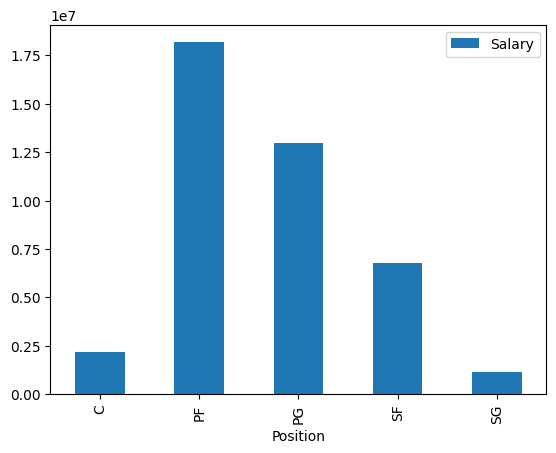

In [30]:
import matplotlib as plt
grpby = mergedataset.groupby(["Position"],as_index= False)["Salary"].sum()
postionwisesalary_bar = grpby.plot(x = "Position",y = "Salary",kind ="bar")
postionwisesalary_bar


In [32]:

mergedataset["Age Group"] = pd.cut(mergedataset['Age'],bins= 3,labels=("Young","Middle Age","Old"))
mergedataset

,Name,Team,Salary,Position,Age,Height,Weight,Age Group
0,Avery Bradley,Boston Celtics,7730337.0,PG,25.0,6-2,180.0,Middle Age
1,Jae Crowder,Boston Celtics,6796117.0,SF,25.0,6-6,235.0,Middle Age
2,John Holland,Boston Celtics,0.0,SG,27.0,6-5,205.0,Old
3,R.J. Hunter,Boston Celtics,1148640.0,SG,22.0,6-5,185.0,Young
4,Jonas Jerebko,Boston Celtics,5000000.0,PF,29.0,6-10,231.0,Old
5,Amir Johnson,Boston Celtics,12000000.0,PF,29.0,6-9,240.0,Old
6,Jordan Mickey,Boston Celtics,1170960.0,PF,21.0,6-8,235.0,Young
7,Kelly Olynyk,Boston Celtics,2165160.0,C,25.0,7-0,238.0,Middle Age
8,Terry Rozier,Boston Celtics,1824360.0,PG,22.0,6-2,190.0,Young
9,Marcus Smart,Boston Celtics,3431040.0,PG,22.0,6-4,220.0,Young


In [41]:
grpby = mergedataset.groupby(["Age Group"])["Salary"].sum()
grpby

Age Group
Young          7575000.0
Middle Age    16691614.0
Old           17000000.0
Name: Salary, dtype: float64

<Axes: ylabel='Salary'>

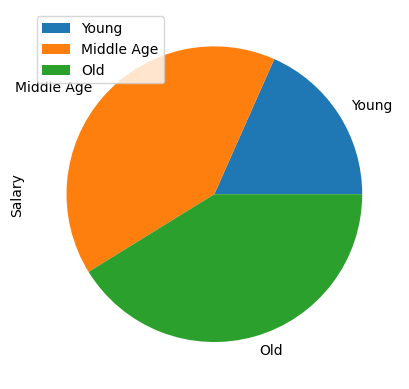

In [42]:
grp_age = grpby.plot(x = "Age Group",y="Salary",kind = "pie")
grp_age